# Diabetes

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()     
data = np.c_[diabetes.data, diabetes.target]
columns = np.append(diabetes.feature_names, ["target"])
df = pd.DataFrame(data, columns=columns)

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

Understanding of feature names and our target

In [10]:
print("Features\n")
print(diabetes.feature_names)

Features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Understanding of the dimensions of our dataset

In [11]:
df.shape

(442, 11)

So our dataset describs 442 samples of diabetes patients , along with 10 features and the information of the progression of the diease in the 11th column

Taking a peek at our data

In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


A statistical summary of all attributes

In [18]:
pd.set_option('precision', 2)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,442.00
mean,-3.63e-16,1.31e-16,-8.05e-16,1.28e-16,-8.84e-17,1.33e-16,-4.57e-16,3.78e-16,-3.83e-16,-3.41e-16,152.13
std,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,77.09
min,-1.07e-01,-4.46e-02,-9.03e-02,-1.12e-01,-1.27e-01,-1.16e-01,-1.02e-01,-7.64e-02,-1.26e-01,-1.38e-01,25.00
25%,-3.73e-02,-4.46e-02,-3.42e-02,-3.67e-02,-3.42e-02,-3.04e-02,-3.51e-02,-3.95e-02,-3.32e-02,-3.32e-02,87.00
50%,5.38e-03,-4.46e-02,-7.28e-03,-5.67e-03,-4.32e-03,-3.82e-03,-6.58e-03,-2.59e-03,-1.95e-03,-1.08e-03,140.50
75%,3.81e-02,5.07e-02,3.12e-02,3.56e-02,2.84e-02,2.98e-02,2.93e-02,3.43e-02,3.24e-02,2.79e-02,211.50
max,1.11e-01,5.07e-02,1.71e-01,1.32e-01,1.54e-01,1.99e-01,1.81e-01,1.85e-01,1.34e-01,1.36e-01,346.00


**Correlation between attributes**

In [19]:
df.corr(method='pearson')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


Let's see this in Matrix form

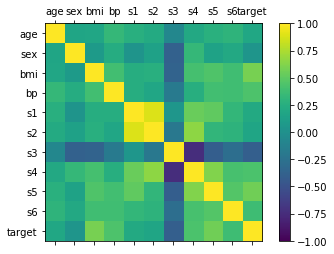

In [20]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(method='pearson'), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(df))
ax.set_yticklabels(list(df))
plt.show()

We can see that there is great correlation between s1 and s2

<function matplotlib.pyplot.show(*args, **kw)>

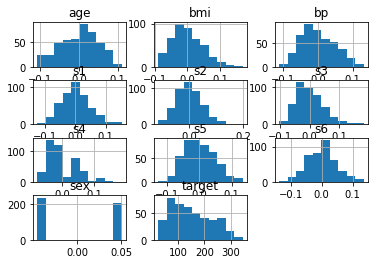

In [21]:
h = df.hist()
plt.show

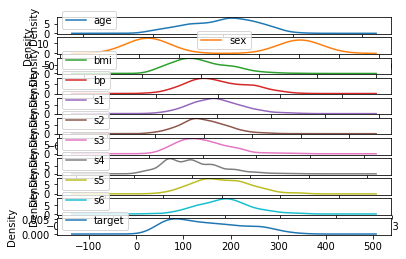

In [22]:
df.plot(kind='density', subplots=True, sharex=False)
plt.show()

**Skew of Univariate Distributions**

In [23]:
df.skew()

age      -0.23
sex       0.13
bmi       0.60
bp        0.29
s1        0.38
s2        0.44
s3        0.80
s4        0.74
s5        0.29
s6        0.21
target    0.44
dtype: float64

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [26]:
# Rescale data (between 0 and 1)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = df.values
# separate array into input and output components
X = array[:,0:10]
Y = array[:,10]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.667 1.    0.583 0.549 0.294 0.257 0.208 0.282 0.562 0.439]
 [0.483 0.    0.149 0.352 0.422 0.307 0.623 0.141 0.222 0.167]
 [0.883 1.    0.517 0.437 0.289 0.259 0.247 0.282 0.497 0.409]
 [0.083 0.    0.302 0.31  0.495 0.447 0.234 0.423 0.573 0.47 ]
 [0.517 0.    0.207 0.549 0.466 0.417 0.39  0.282 0.362 0.333]]


## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

Since s1 and s2 are highly related, let's keep just the s2

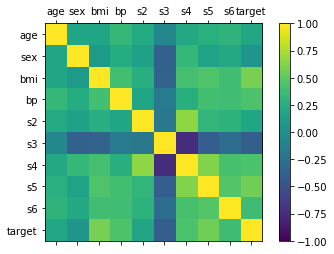

In [28]:
new_df = df[['age','sex','bmi', 'bp','s2', 's3','s4','s5','s6','target']]
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(new_df.corr(method='pearson'), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(new_df))
ax.set_yticklabels(list(new_df))
plt.show()

In [31]:
# rescale data
X = new_df.values[:,0:9]
Y = new_df.values[:,9]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.667 1.    0.583 0.549 0.257 0.208 0.282 0.562 0.439]
 [0.483 0.    0.149 0.352 0.307 0.623 0.141 0.222 0.167]
 [0.883 1.    0.517 0.437 0.259 0.247 0.282 0.497 0.409]
 [0.083 0.    0.302 0.31  0.447 0.234 0.423 0.573 0.47 ]
 [0.517 0.    0.207 0.549 0.417 0.39  0.282 0.362 0.333]]


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('kNN',     KNeighborsRegressor()))

In [37]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [38]:
# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

        LR: -3009.401394 (+/- 656.199942)
     RIDGE: -3361.193126 (+/- 608.481482)
       kNN: -3627.945283 (+/- 723.619524)


<IPython.core.display.Javascript object>


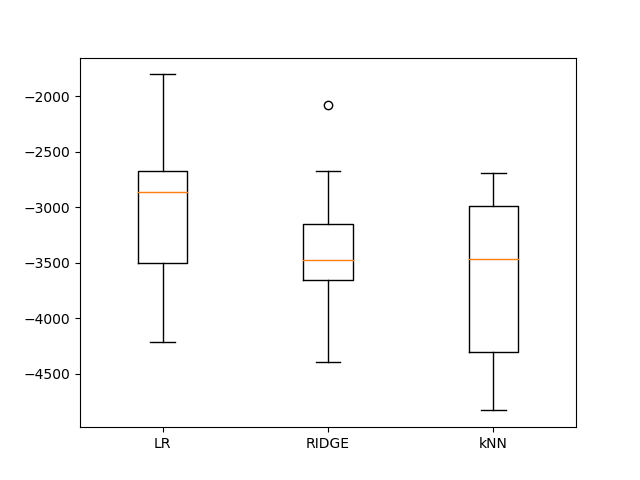

In [39]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

We can see that all models achieve a very high accuracy score and with Linear Regression we can achieve the best score.

## To optimize LR parameters

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model = models[0][1]
grid = GridSearchCV(model, parameters)
grid.fit(X, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.fit_intercept)
print(grid.best_estimator_.normalize)
print(grid.best_estimator_.copy_X)

0.4857095872971567
True
False
True


The optimized parameters are the default values used by sklearn, so no need to re-run it